Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [28]:
NAME = "Magali"
COLLABORATORS = "NA"

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [64]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    
    high_q = -float("inf")
    hiring_n = 0
    for i in range(0,len(applicants)):
        if applicants[i] > high_q:
            high_q = applicants[i]
            hiring_n = hiring_n +1
    return hiring_n
    raise NotImplementedError()

In [65]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [70]:
import random
def experimental_hires(N):
    estimate = []
    for s in range(100): # number of simulations
        simulated_N = [random.randrange(-100, 100) for _ in range(0, N)]
        number = hire_assistant(simulated_N)
        estimate.append(number)
    avg = sum(estimate)/len(estimate)
    return avg # if want to return non-float / integer value simply write int(avg)
    raise NotImplementedError()

In [71]:
# testing
test = experimental_hires(50)
test

4.44

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [77]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

Text(0, 0.5, 'average number of hires')

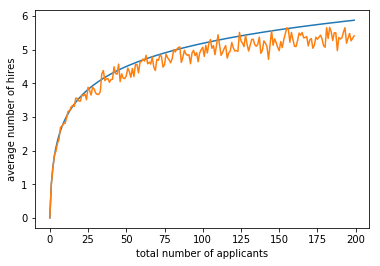

In [79]:
import matplotlib.pyplot as plt

N_list = []
AN_list = []
SIM_list = []

for n in range(0,200):
    N_list.append(n)
    an_h = analytical_hires(n)
    AN_list.append(an_h)
    sim_h = experimental_hires(n)
    SIM_list.append(sim_h)

# plotting
A = plt.plot(N_list, AN_list)
B = plt.plot(N_list, SIM_list)
C = A+B
C
plt.xlabel("total number of applicants")
plt.ylabel("average number of hires")

# raise NotImplementedError()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

In [82]:
import random
def probability_one(N):
    estimate = []
    prob_one = 0
    for s in range(100): # number of simulations
        simulated_N = [random.randrange(-100, 100) for _ in range(0, N)]
        number = hire_assistant(simulated_N)
        estimate.append(number)
    for i in range(len(estimate)):
        if estimate[i] == 1:
            prob_one =+1
    prob_one/len(estimate)
    print(prob_one)
    return prob_one 
    raise NotImplementedError()

def simulate_prob(x):
    sim_prob = []
    for n in range(1,x+1):
        sim_prob.append(prob_one(n))
    est_prob = sum(sim_prob)/len(sim_prob)
    return est_prob

N_list = []
AN_list = []

for n in range(0,200):
    N_list.append(n)
    an_h = simulate_prob(n)
    AN_list.append(an_h)

# plotting
A = plt.plot(N_list, AN_list)
A
plt.xlabel("total number of applicants")
plt.ylabel("average number of hires")

    
raise NotImplementedError()

ZeroDivisionError: division by zero

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

YOUR ANSWER HERE

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

YOUR ANSWER HERE

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE